# Working with Skewed Data
Through this notebook, I'll show you some transformations to be used in skewed distributions, in order to reach a normal distributed-like pattern. This transformations are a critical part of data cleansing.

Here we'll apply some of the most common transformantios, and some more complext, summarized below:
1. square root 
2. reciprocal 
3. logarithmic
4. exponential 
5. power transformation 
6. arcsine transformation
7. Box-Cox transformation
8. Yeo-Johnson transformation

## Import data
The dataset used here is small sample of imdb movies. so let's import it to pandas and quickly check some informations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
imdb = pd.read_csv('movie_imdb.csv')

In [3]:
print('We have',imdb.shape[0],'samples and',imdb.shape[1],'labels')

We have 5043 samples and 28 labels


In [4]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### Working with NaN Values
Let's check NaN values, and work with them:

In [5]:
imdb.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
df = imdb.dropna()
df = df.select_dtypes(include=['float64','int64'])
print('After drop NaN we have', round(df.shape[0]/imdb.shape[0]*100,2),'% of initial data')
print('And now is composed by ',df.shape[0],'samples and',df.shape[1],'labels')

After drop NaN we have 74.48 % of initial data
And now is composed by  3756 samples and 16 labels


In [7]:
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [8]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


# Working with Skewness

Real-world data can, and usually is, messy. Skewed distribution happens all the time, hence we need to work with this prior to modeling. 

### But why is that?

As is know from statistics, long tails (or in other words skewed distributions) may act as <b>outliers</b> for the statistical model, and <i>several models use polynomial calculations</i> on the predictor data i.e. labels, such as most linear models, neural networks, and SVM. 
Thus, in those cases, a <b>skewed label distribution</b> could have a <b>negative effect</b> over the models, since tails of distributions can dominate the underlying calculations, even though some models are robust to outliers (e.g. Tree-based), limiting the number of models that could be chosen [[1]](https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37).

As a general rule of thumb, we can consider that:
- if skewness < -1 && skewness > 1 $\rightarrow$ distribution is <b>highly skewed</b>;
- if -1 < skewness < -0.5 || 0.5 < skewness < 1 $\rightarrow$ distribution is <b>moderately skewed</b>;
- if -0.5 < skeweness < 0.5 $\rightarrow$ distribution is <b>approximately symmetric</b>.

Calculating the skewness for this data by using the Fischer-Perarson standardized moment coefficient [[2]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html),[[3]](https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0), we see that only the predictor <i>"imdb_score"</i> is moderately skewed, which leaves us with a lot of work from now on!

In [9]:
skewness = df.skew().sort_values(ascending=False)
skewness = pd.DataFrame(skewness, columns=['skewness'])
skewness

,skewness
budget,44.174144
actor_1_facebook_likes,20.339471
aspect_ratio,16.014406
cast_total_facebook_likes,12.894874
actor_2_facebook_likes,9.010298
actor_3_facebook_likes,6.370114
facenumber_in_poster,4.949414
director_facebook_likes,4.754529
movie_facebook_likes,4.516867
num_user_for_reviews,3.844204


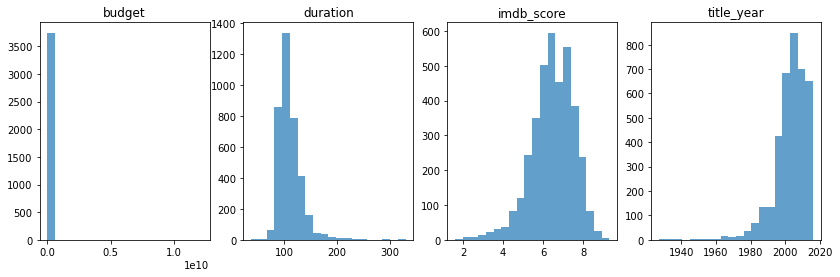

In [10]:
labels = [df['budget'], df['duration'], df['imdb_score'], df['title_year']]
titles = ['budget', 'duration', 'imdb_score','title_year']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,4))

def plot_hist(labels, titles):
    for ax, label, title in zip(axes.flatten(), labels, titles):
        ax.hist(label, bins=20, alpha=.7)
        ax.set_title(title)
        
plot_hist(labels, titles)

## Hands-on!

Let's start by appling some transformations for the predictors for cases that fit in most common transformations [[4]](https://www.ibm.com/support/pages/transforming-variable-normality-parametric-statistics),[[5]](https://www.statisticssolutions.com/transforming-data-for-normality/):
1. square root $\rightarrow \sqrt{x}$
2. reciprocal $\rightarrow 1/x$
3. logarithmic $\rightarrow log(x)$
4. exponential $\rightarrow e^x$
5. power transformation $\rightarrow x^n, n \in \Re$
6. arcsine transformation $\rightarrow arcsin(x)$

### 1. Square Root Transformation

Use if:
- data have a <b>positive (right) skew</b>;
- data may be <b>counts or frequencies</b>;
- data have many <b>zeros or extremely small values</b>;
- data may have a <b>physical (power) component</b> (e.g. area  vs. length).

Applying this transformation in two predictors that have positive skew: "budget" (largest skew) and "gross", we're able to <b>reduce skew</b> for both (in the case of "budget", from 44 to 7.5):

In [11]:
srt = df[['budget','gross']]
srt = srt**(.5)
srt_sk = srt.skew()
srt_sk = pd.DataFrame(srt_sk, columns=['square root'])
sk = skewness.reset_index().merge(srt_sk.reset_index()).set_index('index')
sk

,skewness,square root
index,,
budget,44.174144,7.511698
gross,3.029375,0.959248


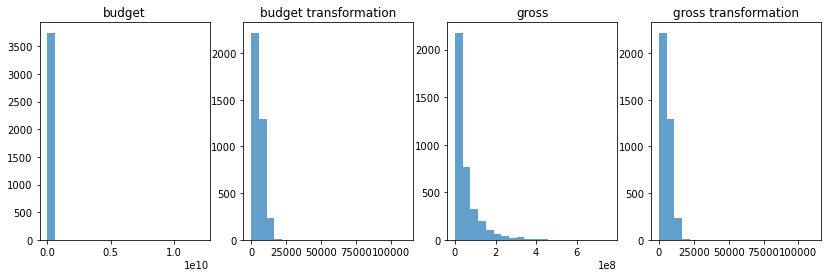

In [12]:
labels = [df['budget'],srt['budget'],df['gross'],srt['budget']]
titles = ['budget','budget transformation','gross','gross transformation']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,4))
plot_hist(labels, titles)

### 2. Reciprocal transformation

Use if:
- data have a <b>positive (right) skew</b>;
- data may have been <b>originally derived by division</b>, or <b>represents ratio</b>;
 
PS: data must be positive, and not close to zero!

Applying the transformation to "aspect_ratio" and "duration", both of which has a positive skew, we're able to <b>reduce skew</b> from 16 to -0.5, and from 2.4 to -0.24. One interesting thing here is that, if we add one to the values, the skew then becomes negative, with a better symmetry though:

In [13]:
invert = df[['aspect_ratio','duration']]
invert = 1/invert
invert1 = 1/(invert+1)
invert_sk = invert.skew()
invert1_sk = invert1.skew()
skew = pd.DataFrame(invert_sk, columns=['1/x'])
skew['1/(x+1)'] = invert1_sk
sk = skewness.reset_index().merge(skew.reset_index()).set_index('index')
sk

,skewness,1/x,1/(x+1)
index,,,
aspect_ratio,16.014406,0.896464,-0.505866
duration,2.402552,0.269888,-0.236016


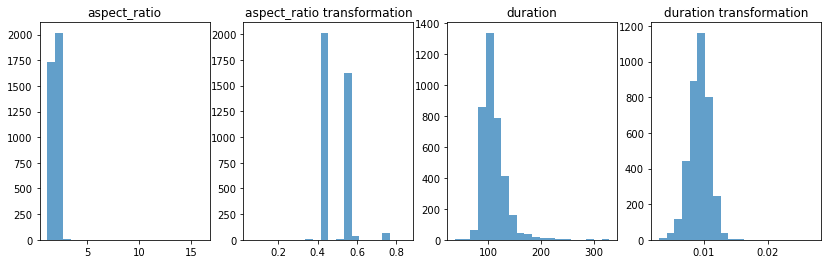

In [14]:
labels = [df['aspect_ratio'], invert['aspect_ratio'], df['duration'], invert['duration']]
titles = ['aspect_ratio','aspect_ratio transformation', 'duration', 'duration transformation']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,4))
plot_hist(labels, titles)

### 3. Logarithmic transformation

Use if:
- data have a <b>positive (right) skew</b>;
- you suspect an <b>exponential component</b> in the data;
- data might be best classified by <b>orders-of-magnitude</b> (e.g. 1,10,100);
- <b>cumulative main effects</b> are <b>multiplicative</b>, rather than additive.

PS: data must be positive, and the base of the logarithm is arbitrary (common bases are 10 and 2).

Applying ln, log10, and log2 transformations on the predictiors "budget" and "num_user_for_reviews", and , we could <b>decrease skew</b> from 44 to -1.3, 3.8 to -0.16, respectively. So, in this case, the ln <b>transformation positively affects</b> skew:

In [15]:
ln = df[['budget','num_user_for_reviews']]
ln = np.log(ln)
ln1 = np.log(ln+1)
ln_sk = ln.skew()
ln1_sk = ln1.skew()
skew = pd.DataFrame(ln_sk, columns=['ln(x)'])
skew['ln(x+1)'] = ln1_sk
sk = skewness.reset_index().merge(skew.reset_index()).set_index('index')
sk

,skewness,ln(x),ln(x+1)
index,,,
budget,44.174144,-1.310316,-2.157166
num_user_for_reviews,3.844204,-0.162882,-0.817460


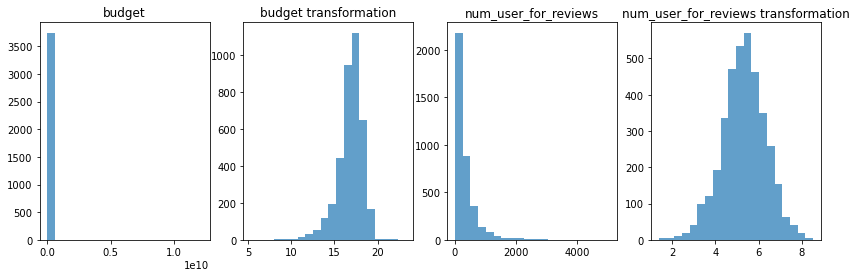

In [16]:
labels = [df['budget'],ln['budget'],df['num_user_for_reviews'],ln['num_user_for_reviews']]
titles = ['budget','budget transformation','num_user_for_reviews','num_user_for_reviews transformation']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,4))
plot_hist(labels, titles)

In [17]:
log = df[['budget','num_user_for_reviews']]
log = np.log10(log)
log1 = np.log10(log+1)
log_sk = log.skew()
log1_sk = log1.skew()
skew = pd.DataFrame(log_sk, columns=['log10(x)'])
skew['log10(x+1)'] = log1_sk
sk = skewness.reset_index().merge(skew.reset_index()).set_index('index')
sk

,skewness,log10(x),log10(x+1)
index,,,
budget,44.174144,-1.310316,-2.061327
num_user_for_reviews,3.844204,-0.162882,-0.674409


In [18]:
log = df[['budget','num_user_for_reviews']]
log = np.log2(log)
log1 = np.log2(log+1)
log_sk = log.skew()
log1_sk = log1.skew()
skew = pd.DataFrame(log_sk, columns=['log10(x)'])
skew['log10(x+1)'] = log1_sk
sk = skewness.reset_index().merge(skew.reset_index()).set_index('index')
sk

,skewness,log10(x),log10(x+1)
index,,,
budget,44.174144,-1.310316,-2.183962
num_user_for_reviews,3.844204,-0.162882,-0.865840


### 4. Exponential transformation

Use if:
- data have a <b>negative (left) skew</b>;
- you suspect an <b>underlying logarithmic trend</b> in the data (e.g. decay, survival, etc.);

In this data, none of predicts seems to have an logarithmic trend. But applying the <b>transformation</b> in the "imdb_score" predictor we can see that it <b>negatively affects</b> skew:

In [19]:
exp = df[['imdb_score']]
exp = np.exp(exp)
exp2 = 2**exp
exp_sk = exp.skew()
exp2_sk = exp2.skew()
skew = pd.DataFrame(exp_sk, columns=['exp(x)'])
skew['2^x'] = exp2_sk
sk = skewness.reset_index().merge(skew.reset_index()).set_index('index')
sk

,skewness,exp(x),2^x
index,,,
imdb_score,-0.723327,2.537842,NaN


### 5. Power transformation 
Use if:

- Data have <b>negative (left) skew</b>.
- Data may have a <b>physical (power) component</b>, such as area vs. length.

After applying the power transformation to the "imdb_score" and "title_year" predictors, the skew reduced from -0.7 to -0.1, and from -2 to -1.85. In this case, the power transformation was beneficial to both predictors, and in the case of "title_year", an increase in the power could reduce even more the skew (the predictor is totally linear):

In [20]:
power2 = df[['imdb_score','title_year']]
power2 = power2**2
power3 = power2**3
p2_sk = power2.skew()
p3_sk = power3.skew()
skew = pd.DataFrame(p2_sk, columns=['x**2'])
skew['x**3'] = p3_sk
sk = skewness.reset_index().merge(skew.reset_index()).set_index('index')
sk

,skewness,x**2,x**3
index,,,
imdb_score,-0.723327,-0.104375,1.512247
title_year,-2.070019,-2.025674,-1.858107


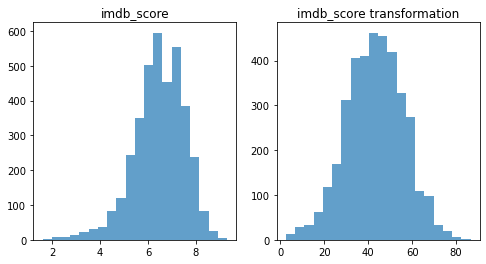

In [21]:
labels = [df['imdb_score'], power2['imdb_score']]
titles = ['imdb_score','imdb_score transformation']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
plot_hist(labels, titles)

### 6. Arcsine transformation
Use if:

- Data are a <b>proportion</b> ranging between 0.0 - 1.0, or <b>percentage</b> from 0 - 100.
- <b>Most</b> data points are <b>between 0.2 - 0.8</b>, or <b>between 20 and 80</b> for <b>percentages</b>.

Since we do not have any kind of data as this here, we'll not approach <i>arcsine transformation</i>.

## Other transformations for skewed data
Now were we'll apply some more complex <b>power transformations</b> to create monotonic transformations of data using power functions, aiming to make date more <i>normal distribution-like</i> [[6]](https://en.wikipedia.org/wiki/Power_transform).

The power transformations is definde as a <b>continuously varying function</b>, with respect to a parameter $\lambda$, in a piece-wise function form that makes it continuous at the point of singularity (i.e. $\lambda$=0).

### 7. Box-Cox transformation
The Box-Cox procedure uses maximum likelihood estimation to estimate a transformation parameter $\lambda$ in the equation [[7]](https://www.ime.usp.br/~abe/lista/pdfm9cJKUmFZp.pdf),[[8]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html):

$$ x = \begin{cases} \frac{x^{\lambda}-1}{\lambda} \rightarrow \lambda \neq 0 \\ 
log(x) \rightarrow \lambda = 0 \end{cases}$$

It is importante to notice, though, that the Box-Cox procedure can only be applied to data that is <b>strictly positive!</b> To overcome this issue, the Yeo-Johnson procedure is addressed ahead.

As we can see, skewness reduced a lot for most of the predictors. However, some variables cannot be transformed to normal distributed-like, for several different reasons (e.g. imbalanced categorical classes).

In [24]:
df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [25]:
from scipy.stats import skew
from scipy.stats import boxcox as bc

bc_df = df[['budget','duration','imdb_score','title_year']].replace(0, np.nan).dropna(axis=1)
skew_bc = pd.DataFrame(bc_df.skew(), columns=['skewness'])

boxcox_labels = bc_df.columns.tolist()
boxcox = []
for label in boxcox_labels:
    boxcox.append(skew(bc(bc_df[label])[0]))

skew_bc['box-cox'] = boxcox
skew_bc

,skewness,box-cox
budget,44.174144,0.138641
duration,2.402552,-0.163050
imdb_score,-0.723327,-0.021717
title_year,-2.070019,NaN


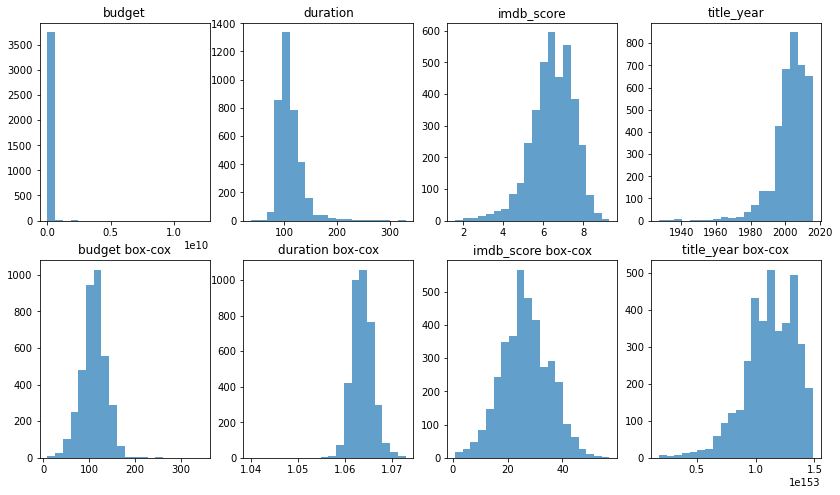

In [27]:
labels = [df['budget'], df['duration'], df['imdb_score'], df['title_year'],
          bc(df['budget'])[0], bc(df['duration'])[0], bc(df['imdb_score'])[0], bc(df['title_year'])[0]]
titles = ['budget', 'duration', 'imdb_score', 'title_year', 'budget box-cox',
          'duration box-cox','imdb_score box-cox','title_year box-cox']
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize=(14,8))
plot_hist(labels, titles);

### 8. Yeo-Johnson transformation
Yeo-Johnson transformation comes to <b>address the non-zero and non-negative values</b> issue of the Box-Cox transformation. Works almost the same way, but when estimating the transformation parameter, it founds the value of $\lambda$ that minimizes the [Kullback-Leibler distance](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between the normal and transformed distribution [[7]](https://www.ime.usp.br/~abe/lista/pdfm9cJKUmFZp.pdf), [[9]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html):

$$ x = \begin{cases}  \frac{(x+1)^{\lambda} - 1}{\lambda} \rightarrow \lambda \neq 0, x >= 0 \\
log(x+1) \rightarrow \lambda = 0, x >=0 \\
\frac{(1-x)^{2-\lambda}-1}{\lambda-2} \rightarrow \lambda \neq 2, x < 0 \\
-log(1-x) \rightarrow \lambda = 2, x < 0 \end{cases}$$

Here, the results were similar to the Box-Cox transformation. Nevertheless, Yeo-Johnson transformation has the big advantage of approach all possible values, in contrast to Box-Cox.

In [32]:
from scipy.stats import yeojohnson as yeo

yeo_df = df[['budget','duration','imdb_score','title_year']].replace(0, np.nan).dropna(axis=1)
skew_yeo = pd.DataFrame(yeo_df.skew(), columns=['skewness'])

yeo_labels = yeo_df.columns.tolist()
yj = []
for label in yeo_labels:
    yj.append(skew(yeo(yeo_df[label])[0]))

skew_yeo['yeo-johnson'] = yj
skew_yeo

,skewness,yeo-johnson
budget,44.174144,0.138634
duration,2.402552,-0.162991
imdb_score,-0.723327,-0.015048
title_year,-2.070019,NaN


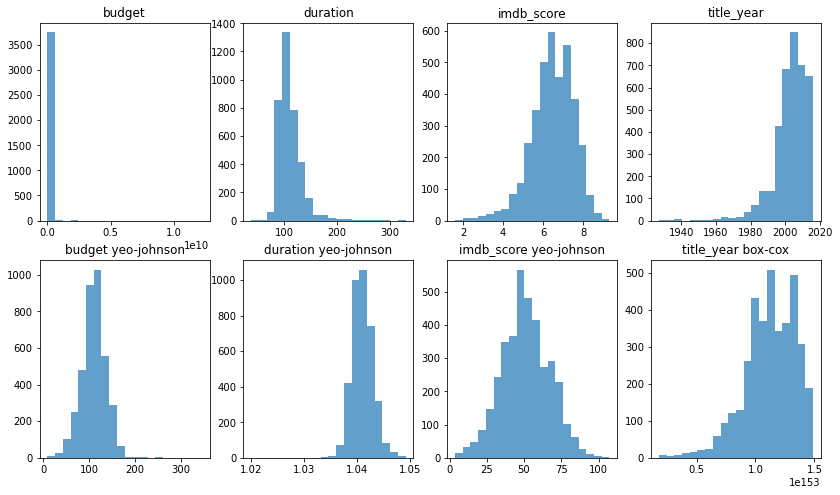

In [33]:
labels = [df['budget'], df['duration'], df['imdb_score'], df['title_year'],
          yeo(df['budget'])[0], yeo(df['duration'])[0], yeo(df['imdb_score'])[0], yeo(df['title_year'])[0]]
titles = ['budget', 'duration', 'imdb_score', 'title_year', 'budget yeo-johnson',
          'duration yeo-johnson','imdb_score yeo-johnson','title_year box-cox']
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize=(14,8))
plot_hist(labels, titles);

### Highlights
Again, for some cases the transformations had a fine result, with Yeo-Johnson transformation being slightly better than Box-Cox for the same keys. It's important to notice that <b>both transformations are unsupervised</b>, and while a transformation might <b>improve</b> the distribution, it has <b>no guarantee</b> that will <b>improve the model</b>.

In [34]:
comparison = skew_bc.reset_index().merge(skew_yeo, how='left').set_index('index')
comparison

,skewness,box-cox,yeo-johnson
index,,,
budget,44.174144,0.138641,0.138634
duration,2.402552,-0.163050,-0.162991
imdb_score,-0.723327,-0.021717,-0.015048
title_year,-2.070019,NaN,NaN
